In [1]:
import numpy as np
import random as rand
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt

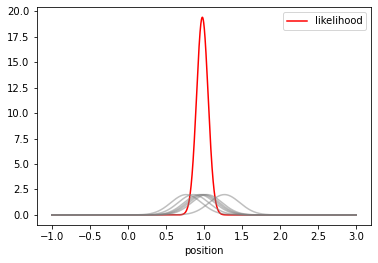

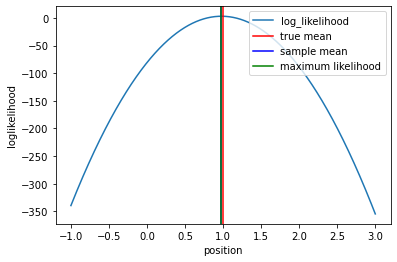

the different between the sample mean and the maximum likelihood maximum is  1.8502767304640066e-05


In [3]:
#generating data
N=7
x=norm(1,0.2).rvs(N)

#creation of the grid

x_grid=np.linspace(-1,3,100000)

#centering a gaussian around each point with the known sigma

gaussians=np.array([norm.pdf(x_grid,loc=l,scale=0.2) for l in x])

#computing the likelihood and plotting the gaussians in each point and the likelihood

likelihood=np.prod(gaussians,axis=0)
plt.plot(x_grid,likelihood,color='red',label='likelihood')
for g in gaussians: plt.plot(x_grid,g,color='grey',alpha=0.5)
plt.legend()
plt.xlabel('position')
plt.show()

#computing the log likelihood

log_likelihood=np.log(likelihood)
    
#plotting the loglikelihood, the true mean, the sample mean and the point of the maximum likelihood

plt.plot(x_grid,log_likelihood,label='log_likelihood')
plt.axvline(x=1,color='red',label='true mean')
plt.axvline(x=np.mean(x),color='blue',label='sample mean')
plt.axvline(x=x_grid[np.argmax(log_likelihood)],color='green', label='maximum likelihood')
plt.xlabel('position')
plt.ylabel('loglikelihood')
plt.legend(loc='upper right')
plt.show()

#comparing the estimates

print('the different between the sample mean and the maximum likelihood maximum is ',np.mean(x)-x_grid[np.argmax(log_likelihood)])

Uncertainty from Fisher matrix:  0.07559289460776097
theoretical uncertainty (sigma/N^0.5) 0.07559289460184544


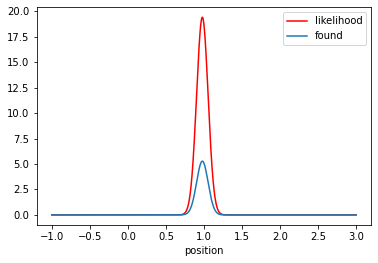

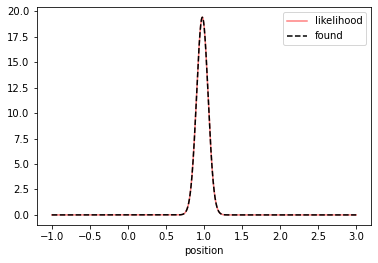

In [4]:
#computing the Fisher information matrix

#defining step

dtheta=x_grid[1]-x_grid[0]

f=np.sqrt(-1*np.diff(log_likelihood,n=2)/dtheta**2)

print('Uncertainty from Fisher matrix: ',1/(f[np.argmax(log_likelihood)]))
print(r'theoretical uncertainty (sigma/N^0.5)',0.2/np.sqrt(N))

#plotting likelihood and found pdf

plt.plot(x_grid,likelihood,color='red',label='likelihood')
g=norm.pdf(x_grid,loc=x_grid[np.argmax(log_likelihood)],scale=1/(f[np.argmax(log_likelihood)]))
plt.plot(x_grid,g,label='found')
plt.xlabel('position')
plt.legend()
plt.show()

#rescaling

scale=np.max(likelihood)/np.max(g)
g=g*scale
plt.plot(x_grid,likelihood,color='red',alpha=0.5,label='likelihood')
plt.plot(x_grid,g,color='black',linestyle='--',label='found')
plt.xlabel('position')
plt.legend()
plt.show()

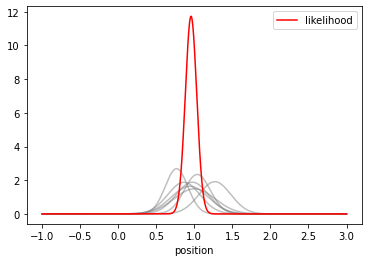

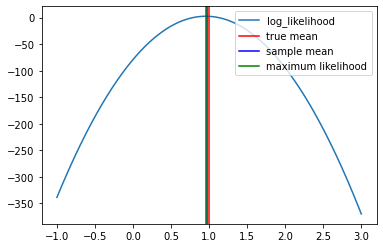

the different between the sample mean and the maximum likelihood maximum is  0.02899433800025153
uncertainty from the Fisher matrix 0.07491364518872616
theoretical uncertainity 0.07491364526004171


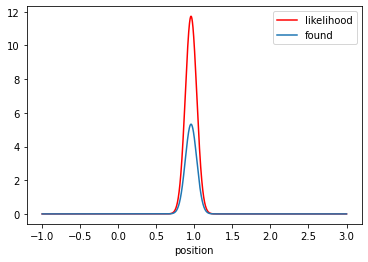

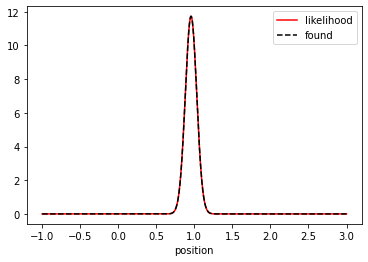

In [7]:
#generalization of the code for heteroscedastic sample

N=7

#sampling sigmas

sigmas=norm(0.2,0.05).rvs(N)

#centering gaussians around each point

gaussians=np.array([norm.pdf(x_grid,loc=l,scale=s) for l,s in zip(x,sigmas)])
    
#computing the likelihood and plotting the gaussians in each point and the likelihood

likelihood=np.prod(gaussians,axis=0)
for g in gaussians: plt.plot(x_grid,g,color='grey',alpha=0.5)
plt.plot(x_grid,likelihood,color='red',label='likelihood')
plt.xlabel('position')
plt.legend()
plt.show()

#computing the log likelihood

log_likelihood=np.log(likelihood)
    
#plotting the loglikelihood, the true mean, the sample mean and the point of the maximum likelihood

plt.plot(x_grid,log_likelihood,label='log_likelihood')
plt.axvline(x=1,color='red',label='true mean')
plt.axvline(x=np.mean(x),color='blue',label='sample mean')
plt.axvline(x=x_grid[np.argmax(log_likelihood)],color='green', label='maximum likelihood')

plt.legend(loc='upper right')
plt.show()

#comparing the estimates

print('the different between the sample mean and the maximum likelihood maximum is ',np.average(x,weights=sigmas)-x_grid[np.argmax(log_likelihood)])

#computing the Fisher information matrix

dtheta=x_grid[1]-x_grid[0]
f=np.sqrt(-1*np.diff(log_likelihood,n=2)/dtheta**2)

print('uncertainty from the Fisher matrix',1/(f[np.argmax(log_likelihood)]))
print('theoretical uncertainity',1/np.sum(1/sigmas**2)**0.5)

#comparing plots

plt.plot(x_grid,likelihood,color='red',label='likelihood')
g=norm.pdf(x_grid,loc=x_grid[np.argmax(log_likelihood)],scale=1/(f[np.argmax(log_likelihood)]))
plt.plot(x_grid,g,label='found')
plt.xlabel('position')
plt.legend()
plt.show()

#rescaling

scale=np.max(likelihood)/np.max(g)
g=g*scale
plt.plot(x_grid,likelihood,color='red',label='likelihood')
plt.plot(x_grid,g,color='black',linestyle='--',label='found')
plt.xlabel('position')
plt.legend()
plt.show()